# Carregando dados

In [1]:
import pandas as pd

df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv("input/test.csv")

# Analise básica dos dados

In [3]:
# Quantidade de itens
len(df_train), len(df_test)

(114321, 114393)

In [2]:
# Quantidade de features
len(df_train.columns), len(df_test.columns)

(133, 132)

In [20]:
# Vendo a cara dos dados
df_train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [21]:
# Exibindo uma descrição básica dos dados
df_train.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,57280.000000,114189.000000,171206.000000,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000,1.000000,1.000000,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,0.913580,1.469550,2.136128,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428,7.023803,9.465497,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398,4.205991,4.833250,20.000000


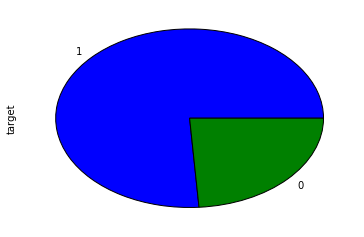

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Distruição dos dados
df_train['target'].value_counts().plot(kind='pie')

# Procurando dados inúteis

In [23]:
# Linhas repetidas (somente train)
len(df_train), len(df_train.drop_duplicates())

(114321, 114321)

In [24]:
# Colunas imutaveis (procura no train, remove em train + test)
changeless_columns = []
for column in df_train.columns:
    if len(df_train[column].unique()) == 1:
        changeless_columns.append(column)
changeless_columns

[]

In [27]:
# Colunas totalmente mutaveis
df_train_len = len(df_train)
no_repetition_columns = []
for column in df_train.columns:
        if len(df_train[column].unique()) == df_train_len:
            no_repetition_columns .append(column)
no_repetition_columns 

['ID']

# Analise de valores únicos por colunas

In [38]:
df_count = pd.DataFrame(columns=['feature', 'count', 'type', 'names'])
for feature in df_train.columns:
    values = list(df_train[feature].unique())
    row = [feature, len(values), df_train[feature].dtype, str(values[:50])]
    df_count.loc[len(df_count)] = row  

df_count.sort_values(['count']).head(50)

,feature,count,type,names
1,target,2.0,int64,"[1, 0]"
75,v74,3.0,object,"['B', 'C', 'A']"
67,v66,3.0,object,"['C', 'A', 'B']"
111,v110,3.0,object,"['B', 'A', 'C']"
32,v31,4.0,object,"['A', 'B', nan, 'C']"
76,v75,4.0,object,"['D', 'B', 'C', 'A']"
4,v3,4.0,object,"['C', nan, 'A', 'B']"
25,v24,5.0,object,"['C', 'E', 'D', 'A', 'B']"
92,v91,8.0,object,"['A', 'B', 'G', 'C', 'F', 'E', 'D', nan]"
31,v30,8.0,object,"['C', nan, 'G', 'D', 'B', 'F', 'A', 'E']"


# Plotando quantidade de NaNs por colunas

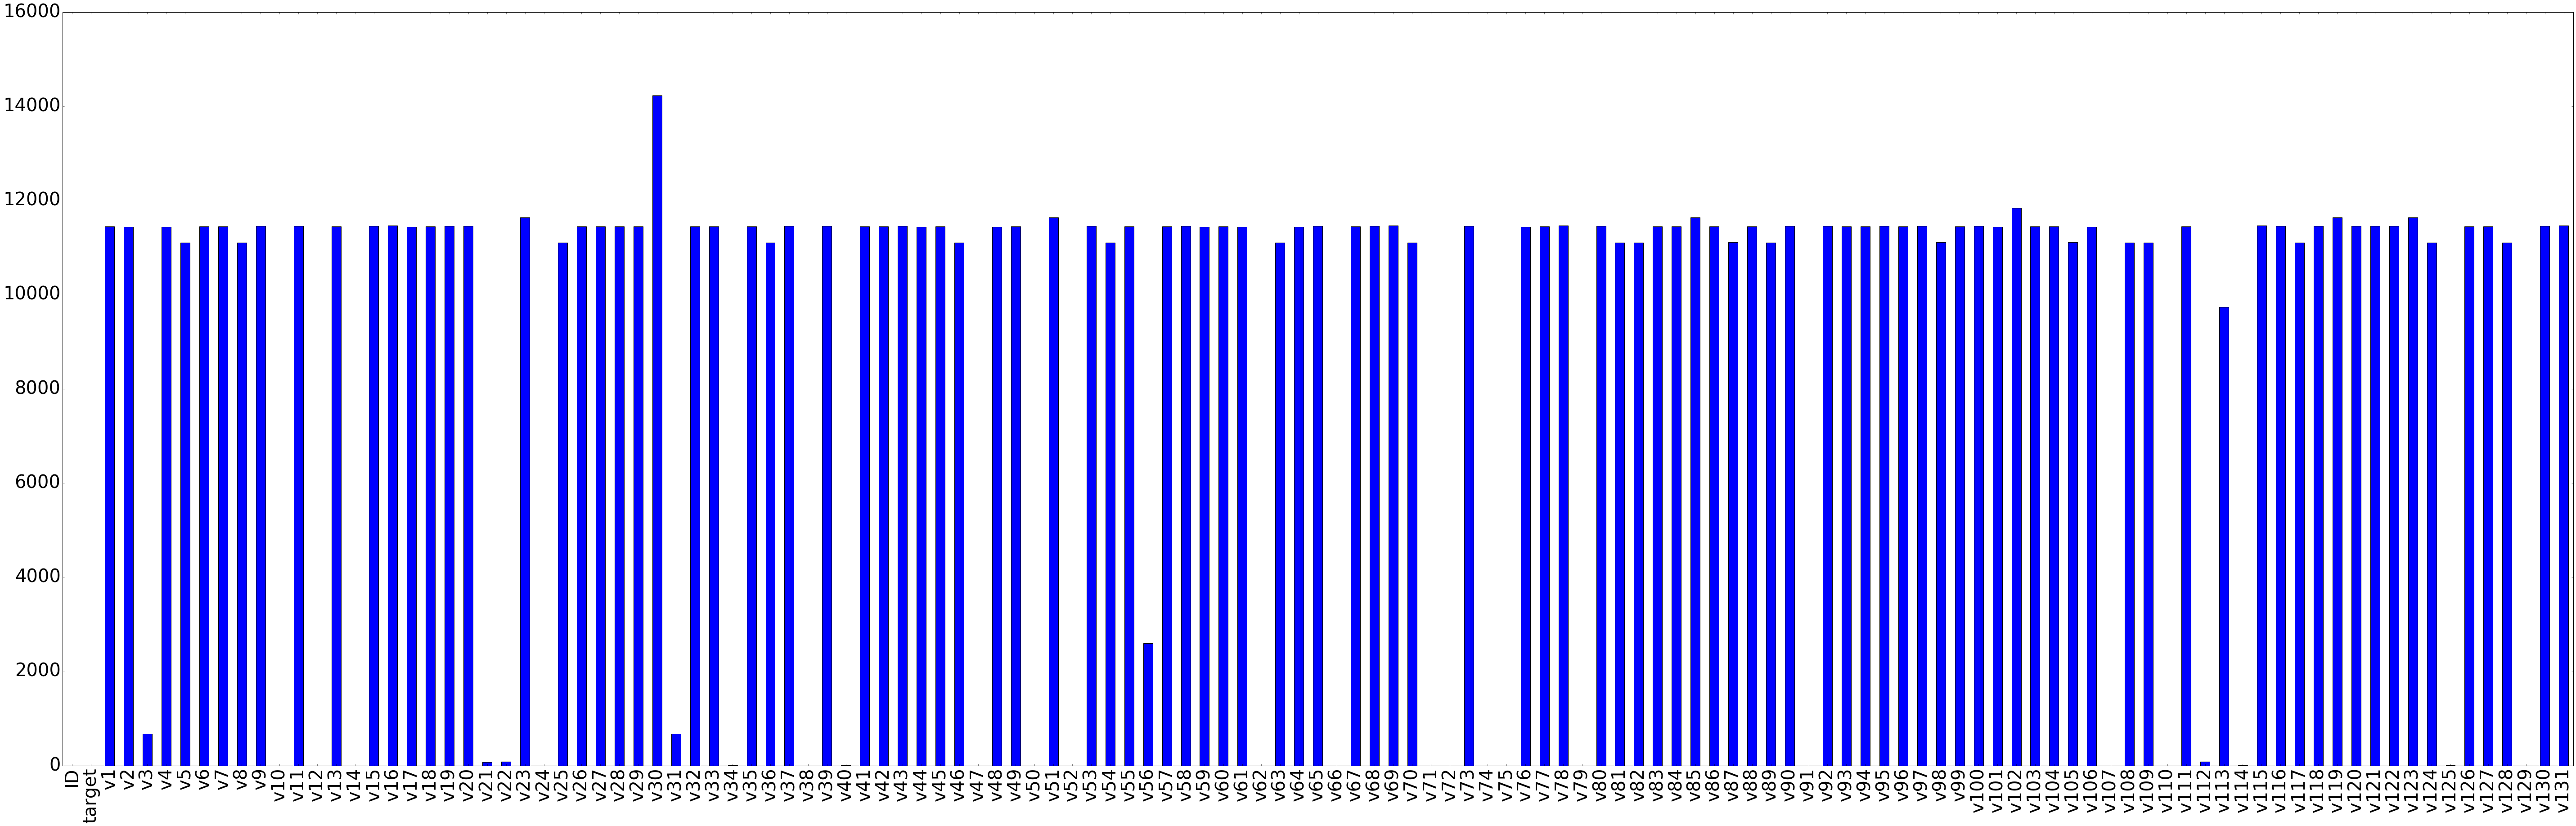

In [43]:
df_nan0 = df_train[df_train['target'] == 0].isnull().sum(axis=0)
df_nan0.plot(kind='bar', figsize=(100,30), fontsize=40)

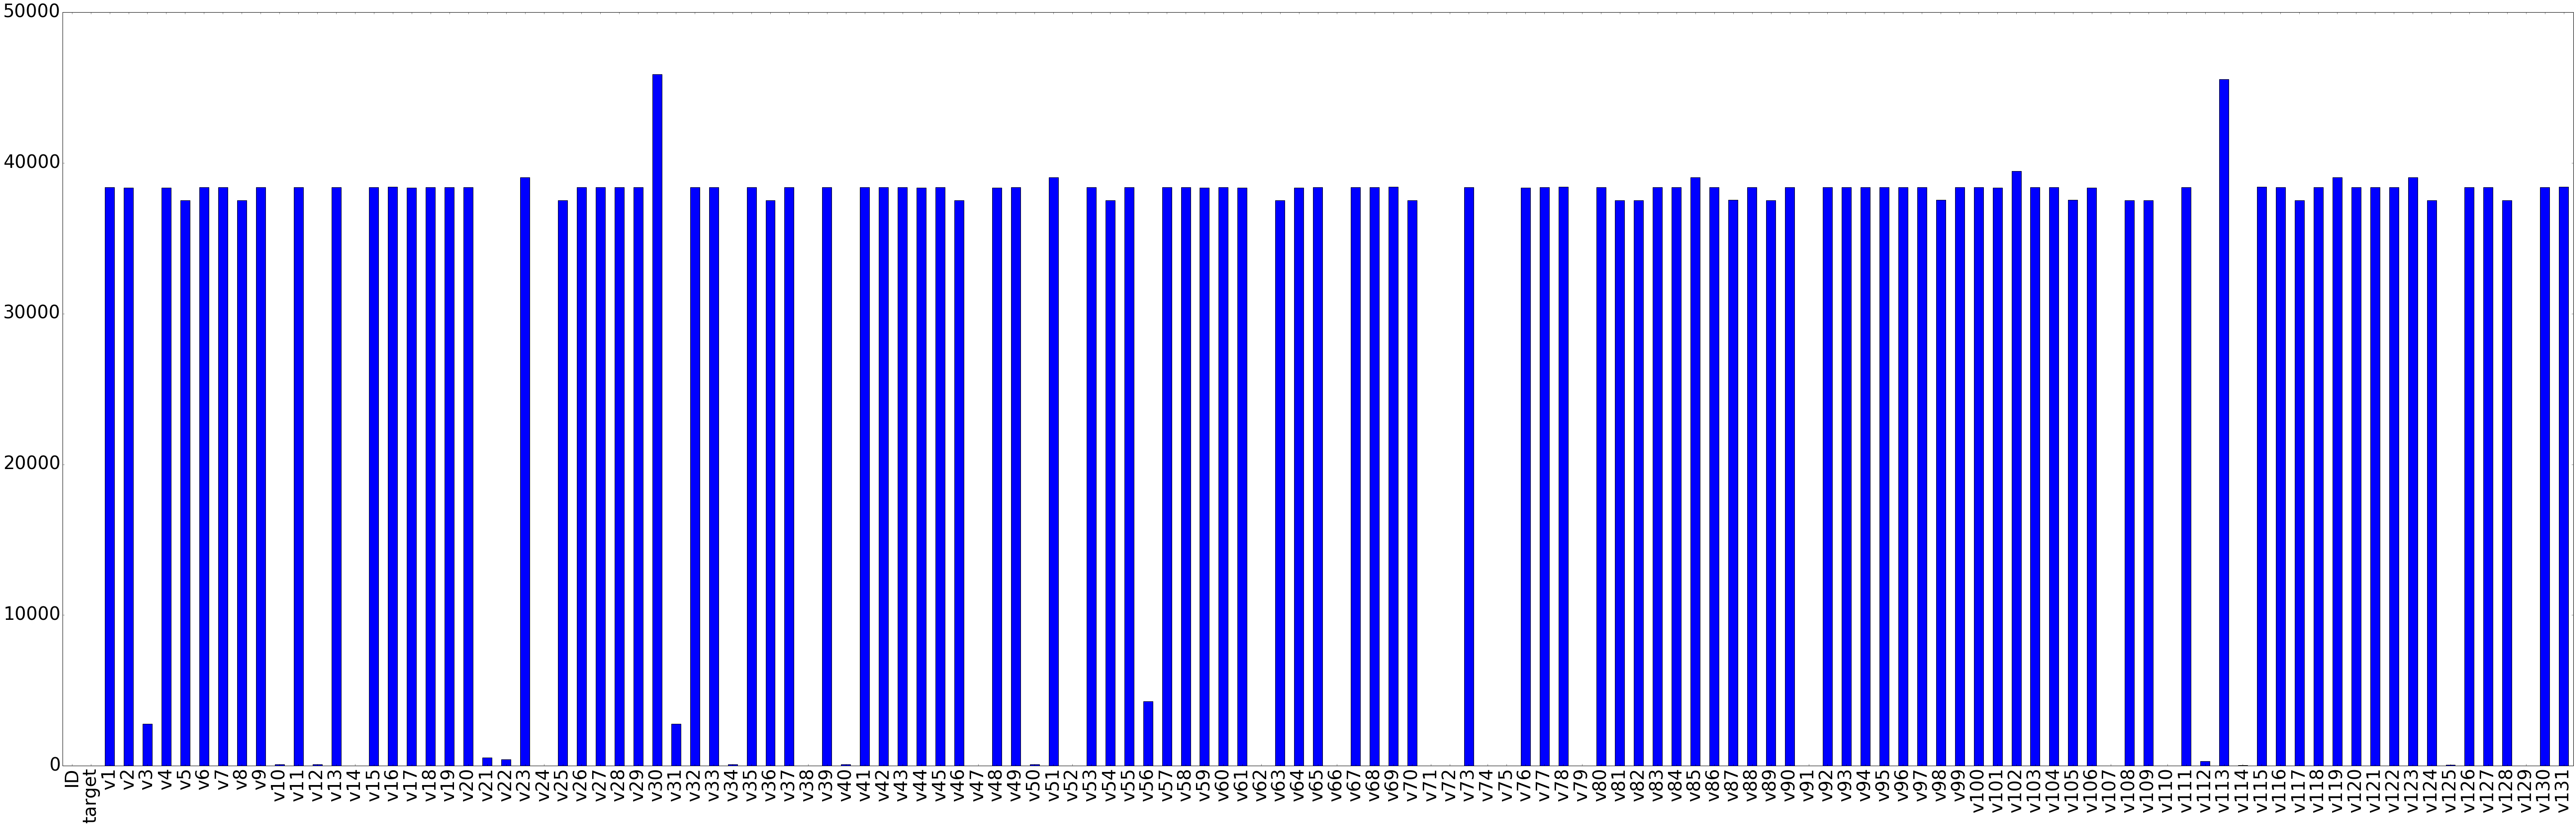

In [44]:
df_nan1 = df_train[df_train['target'] == 1].isnull().sum(axis=0)
df_nan1.plot(kind='bar', figsize=(100,30), fontsize=40)

# Usando o round

In [49]:
for column in df_train.columns:
    if df_train[column].dtype == np.float64:
        df_train[column] = df_train[column].round(2)
df_train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v113_R,v113_S,v113_T,v113_U,v113_V,v113_W,v113_X,v113_Y,v113_Z,v113_nan
0,3,1,1.34,8.73,C,3.92,7.92,2.60,3.18,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,1,NaN,NaN,C,NaN,9.19,NaN,NaN,2.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,0.94,5.31,C,4.41,5.33,3.98,3.93,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6,1,0.80,8.30,C,4.23,11.63,2.10,1.99,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Achando correlação entre as features

In [65]:
corr = df_train.corr()
corr

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v124_Intensity,v126_Intensity,v127_Intensity,v128_Intensity,v130_Intensity,v131_Intensity,Intensity1-SuperLow_Count,Intensity2-MediaLow_Count,Intensity3-MediaHigh_Count,Intensity4-SuperHigh_Count
ID,1.000000,-0.000080,0.002080,0.000496,0.000693,-0.002141,0.003309,0.001036,-0.001209,0.005402,...,0.000147,-0.001870,-0.002546,-0.000835,-0.001733,-0.000088,-0.036880,-0.007571,0.007115,0.031785
target,-0.000080,1.000000,-0.008125,0.036567,0.059847,0.022330,0.030596,0.033367,-0.011439,-0.012562,...,-0.022773,-0.017811,-0.010923,-0.008003,-0.030962,-0.007789,-0.033173,-0.024520,-0.012474,0.013877
v1,0.002080,-0.008125,1.000000,-0.213628,-0.141639,-0.067040,-0.015865,0.099821,0.154095,-0.021206,...,0.156125,0.073694,-0.013206,-0.060810,0.263816,0.665160,0.071674,-0.202271,-0.010053,0.214385
v2,0.000496,0.036567,-0.213628,1.000000,0.537825,0.203349,0.021974,0.350418,-0.362679,-0.008767,...,-0.280691,-0.087724,0.018928,0.285680,-0.565564,0.164775,-0.223976,0.223426,0.066943,-0.147806
v4,0.000693,0.059847,-0.141639,0.537825,1.000000,0.267440,0.374885,0.475095,-0.164224,-0.210692,...,-0.118657,-0.117688,0.289420,0.454008,-0.677465,0.295966,-0.232050,0.132675,0.058047,-0.004645
v5,-0.002141,0.022330,-0.067040,0.203349,0.267440,1.000000,0.243075,0.053258,0.001345,-0.174549,...,0.036166,-0.098589,-0.189642,0.656946,-0.206438,0.161684,-0.323187,-0.086163,0.257021,0.153037
v6,0.003309,0.030596,-0.015865,0.021974,0.374885,0.243075,1.000000,0.193220,0.023132,-0.056835,...,0.012460,-0.156272,0.128567,0.244975,-0.266295,0.159303,-0.234096,-0.007761,0.203637,0.028218
v7,0.001036,0.033367,0.099821,0.350418,0.475095,0.053258,0.193220,1.000000,-0.226665,-0.054215,...,-0.239712,0.276911,0.245144,0.112801,-0.591632,0.312796,-0.106524,0.253621,-0.036768,-0.196050
v8,-0.001209,-0.011439,0.154095,-0.362679,-0.164224,0.001345,0.023132,-0.226665,1.000000,-0.173472,...,0.737156,0.076415,-0.010764,-0.056573,0.272455,-0.020418,0.118251,-0.368555,0.025477,0.422650
v9,0.005402,-0.012562,-0.021206,-0.008767,-0.210692,-0.174549,-0.056835,-0.054215,-0.173472,1.000000,...,-0.196877,-0.343082,0.125842,-0.224595,0.106655,-0.146681,-0.154998,0.212262,0.049545,-0.190288


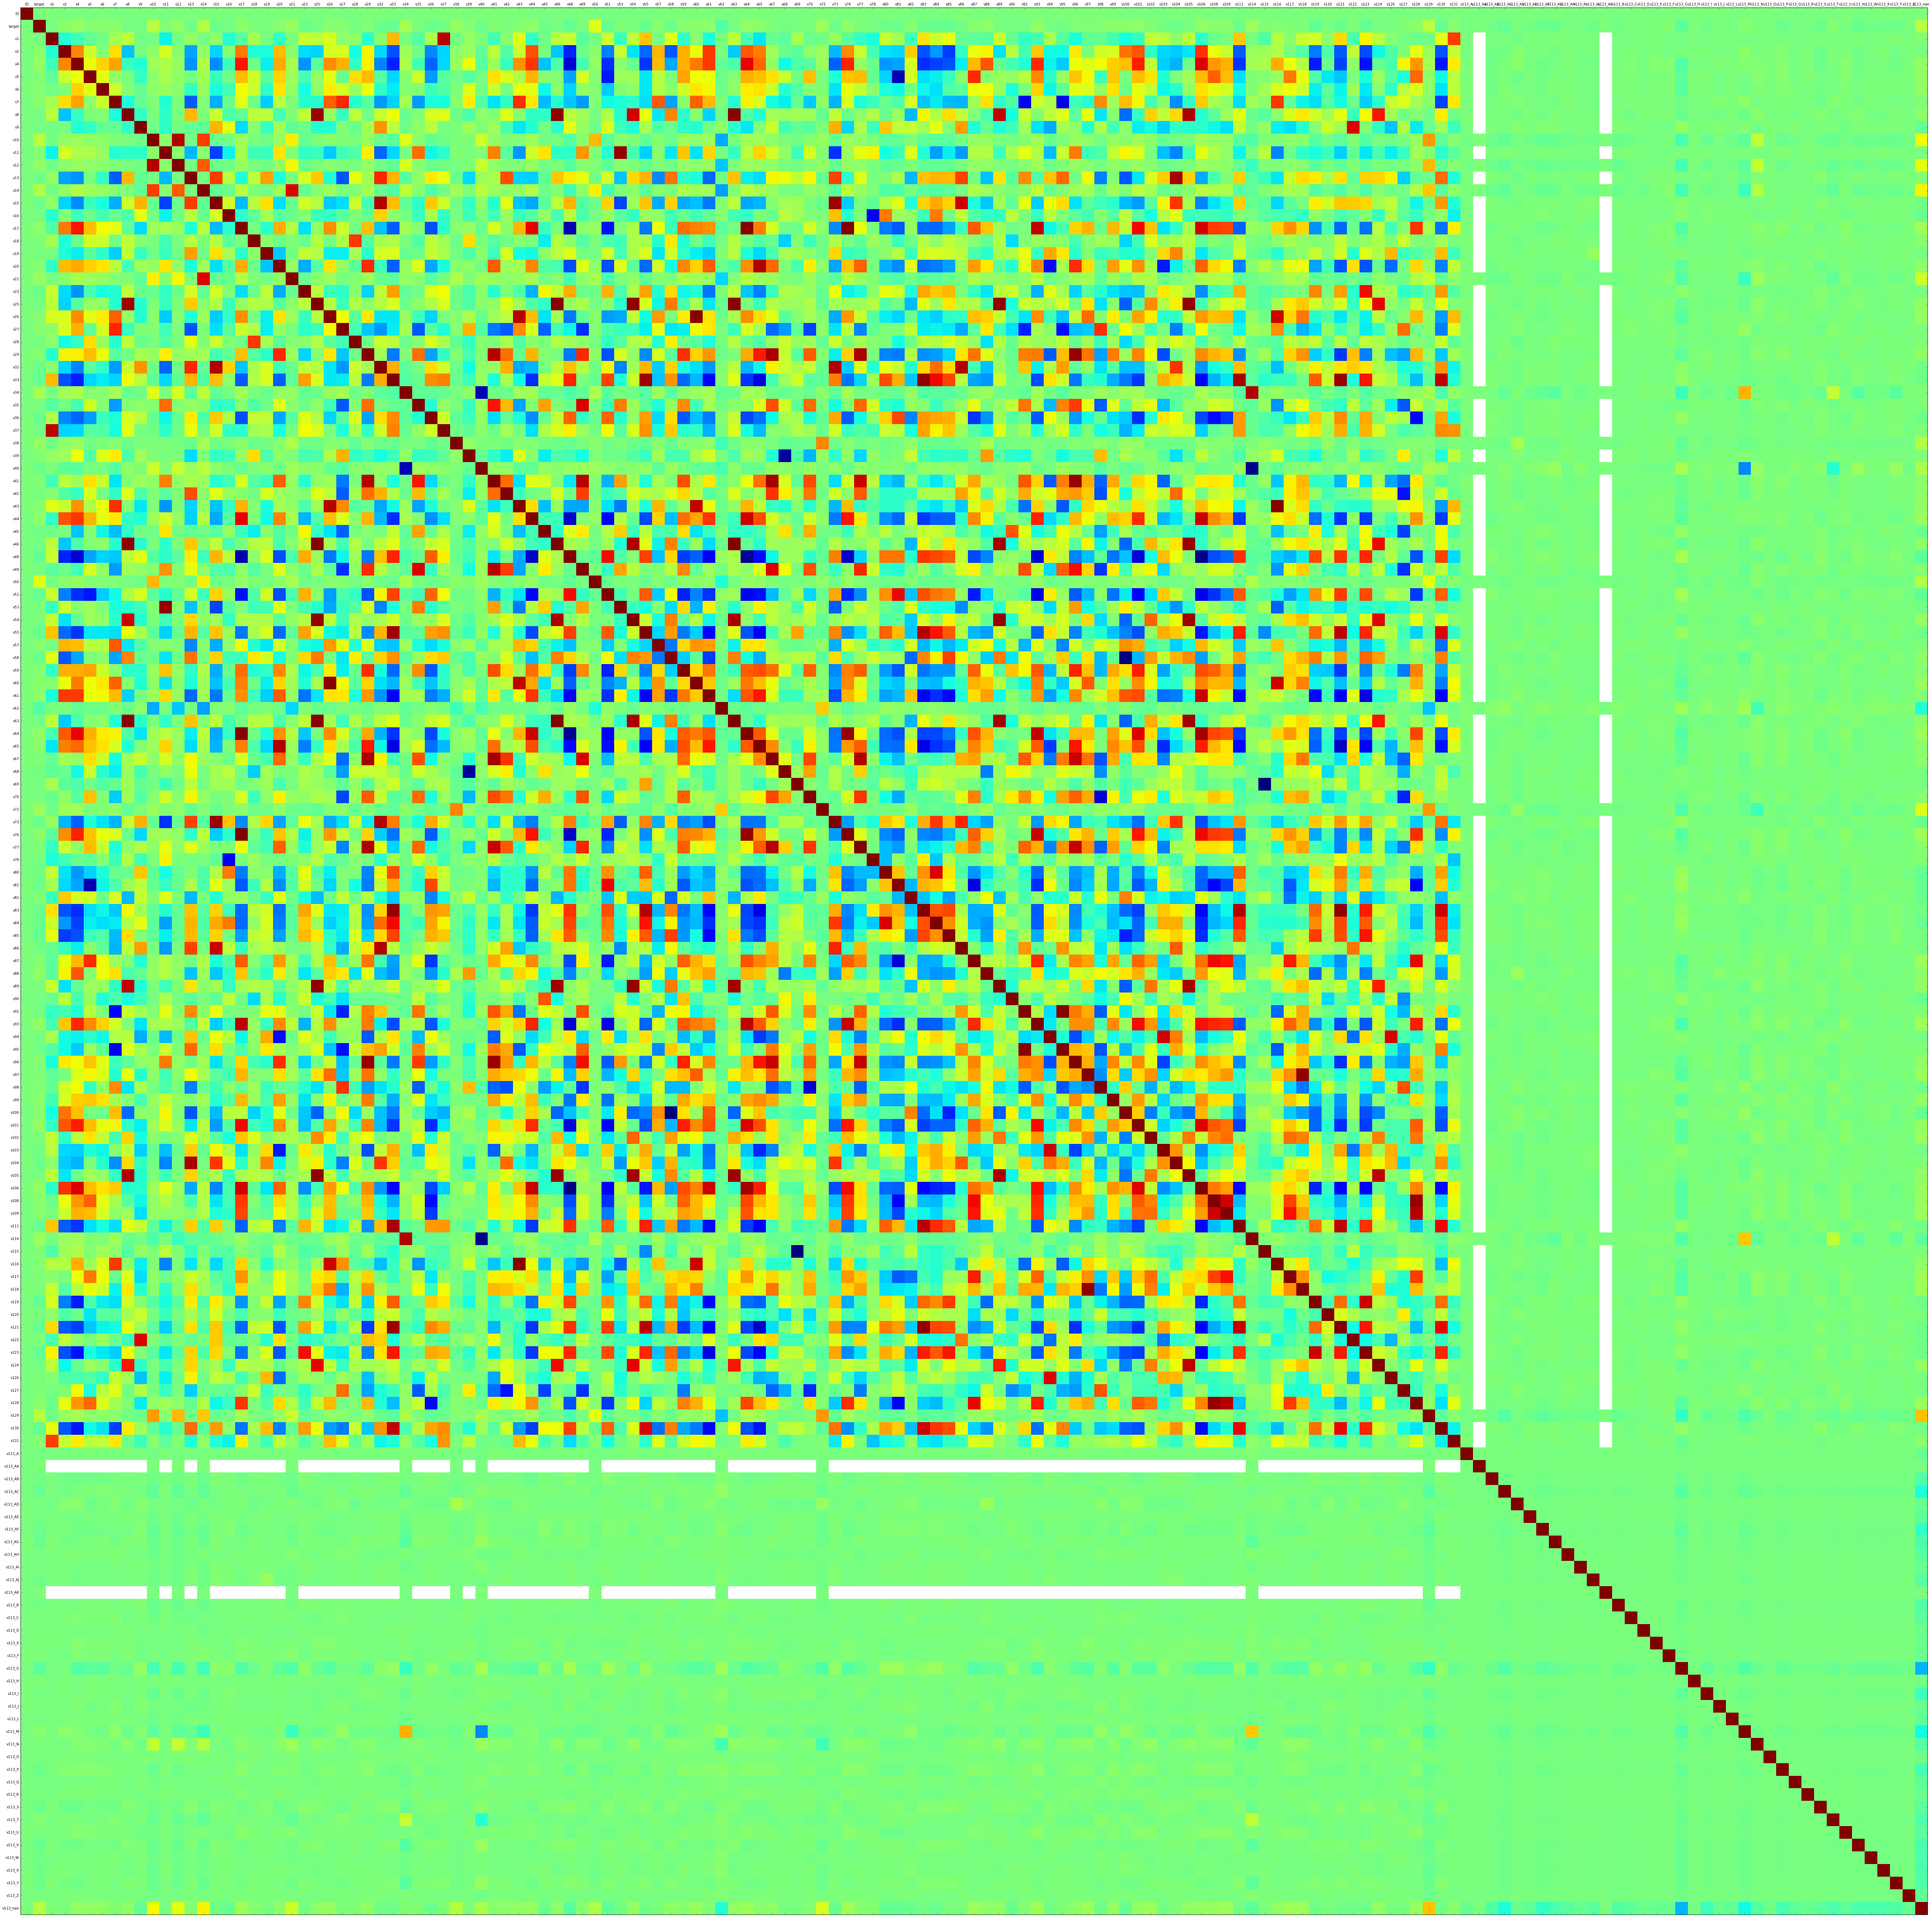

In [61]:
# Plotando correlação
fig, ax = plt.subplots(figsize=(100, 100))
ax.matshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Usando crosstab

In [63]:
df = pd.crosstab(df_train["target"], df_train["v24"], margins=True).transpose()
df

target,0,1,All
v24,,,
A,1015,2774,3789
B,1929,6221,8150
C,4183,16689,20872
D,6731,19602,26333
E,13442,41735,55177
All,27300,87021,114321


In [70]:
# Olhando dados de forma percentual
df = df.apply(lambda x: x/float(x[-1]), axis=1).transpose()
df

target,0,1,All
v24,,,
A,1.121773,0.961798,1.0
B,0.991147,1.002777,1.0
C,0.839242,1.050433,1.0
D,1.070391,0.977917,1.0
E,1.020162,0.993675,1.0
All,1.000000,1.000000,1.0


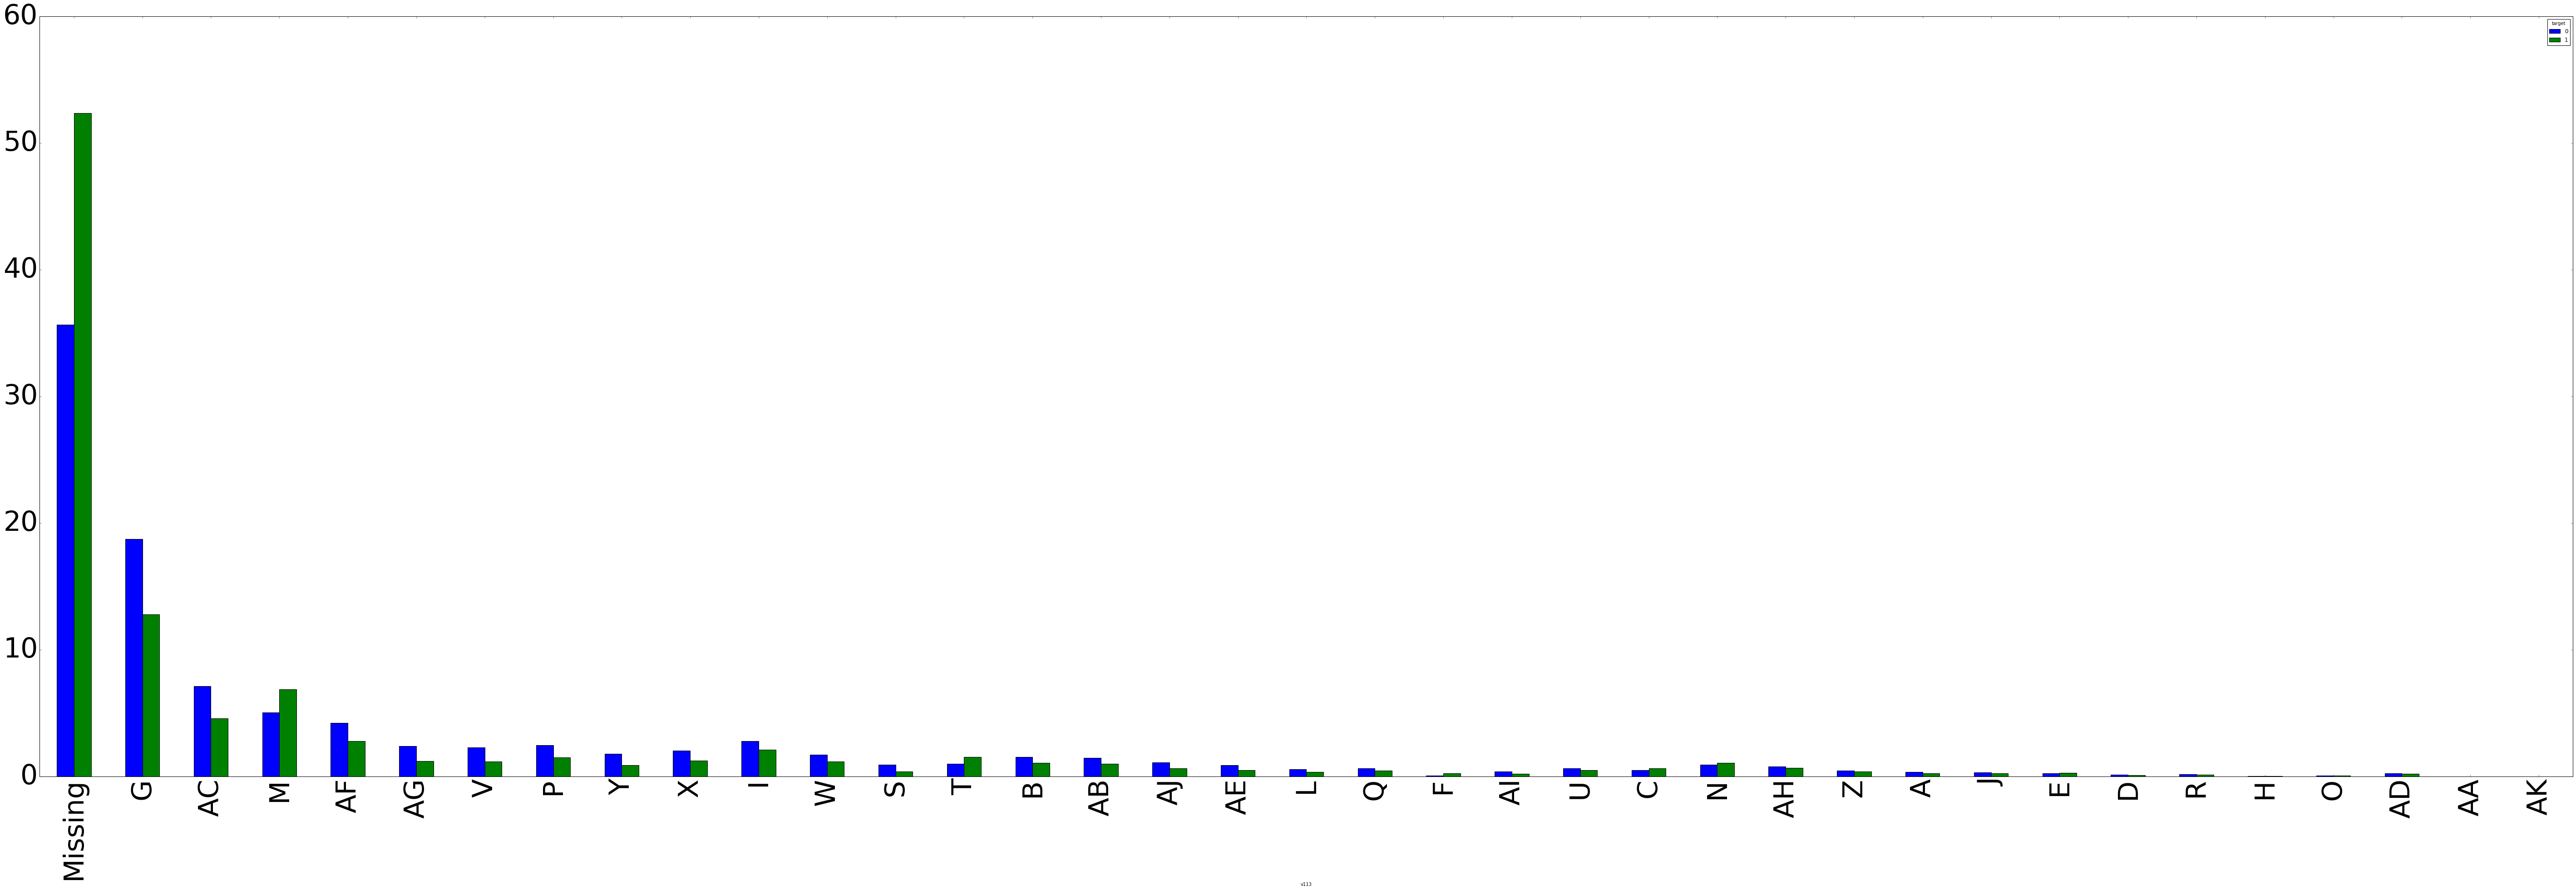

In [54]:
# Plotando o crosstab
df_no_na = df_train["v113"].fillna('Missing')
df = pd.crosstab(df_train["target"], df_no_na, margins=True)

df = df.apply(lambda x: x/float(x[-1]), axis=1).transpose()
df['Diff'] = abs(df[0] - df[1])
df = df.apply(lambda x: 100*x, axis=1).round(2)

df.sort_values(['Diff'], ascending=False, inplace=True)

df[[0, 1]][:-1].plot(kind='bar', figsize=(100,30), fontsize=60)    # Exemplo: v24    Alvos: v113 v125 v56

# Gerando mais features

In [39]:
# Contando NaNs
df_train.isnull().sum(axis=1).values

array([ 1, 81,  2, ..., 82, 82,  1], dtype=int64)

In [40]:
# Contando zeros
df_train[df_train == 0].count(axis=1, numeric_only=True).values

array([2, 2, 1, ..., 1, 2, 2], dtype=int64)

In [41]:
# Contando positivos
df_train[df_train > 0].count(axis=1, numeric_only=True).values

array([110,  31, 111, ...,  32,  31, 112], dtype=int64)

In [42]:
# Contando negativos
df_train[df_train < 0].count(axis=1, numeric_only=True).values

array([2, 0, 2, ..., 0, 0, 0], dtype=int64)

In [45]:
# Gerando features automaticamente
dummies = pd.get_dummies(df_train['v113'], prefix='v113', dummy_na=True)
df_train[dummies.columns] = dummies
df_train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v113_R,v113_S,v113_T,v113_U,v113_V,v113_W,v113_X,v113_Y,v113_Z,v113_nan
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Calculo de intesidade de valores numericos
def calc_intesity(df_means, df_stds, x):
    if np.isnan(x):
        return 'nothing'
    if x > (df_means + df_stds):
        return 'super high'
    elif x >= df_means:
        return 'mean high'
    elif x < (df_means - df_stds):
        return 'super low'
    return 'mean low'

df_means = df_train['v50'].mean()
df_stds = df_train['v50'].std()
df_train['v50_intesity'] =  df_train['v50'].apply(lambda x: calc_intesity(df_means, df_stds, x))
df_train[['v50', 'v50_intesity']].head(10)

,v50,v50_intesity
0,0.90,mean low
1,1.38,mean low
2,0.60,mean low
3,3.33,super high
4,1.36,mean low
5,1.65,mean high
6,0.13,super low
7,2.68,super high
8,1.68,mean high
9,0.99,mean low


In [56]:
# Convertendo valores categoricos para hexadecimal
def az_to_int(az, nan_value=-1):
    if az == az:  # catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower()) - ord('a') + 1) * 26 ** (len(az) - 1 - i)
        return hv
    else:
        if nan_value is not None:
            return nan_value
        else:
            return az
feature = 'v22'     
df_train[feature + '_Hexavigesimal'] = df_train[feature].apply(az_to_int)

df_train[['v22', 'v22_Hexavigesimal']].head()

,v22,v22_Hexavigesimal
0,XDX,16352
1,GUV,5300
2,FQ,173
3,ACUE,20155
4,HIT,5662


# Tratando NaN

In [66]:
for column in df_test.columns:
    if is_numeric_dtype(df_test[column].dtype):
        general_mean = pd.concat([df_train[column], df_test[column]], ignore_index=True).mean()
        df_train[column].fillna(general_mean, inplace=True)
        df_test[column].fillna(general_mean, inplace=True)
    else:
        general_mode = pd.concat([df_train[column], df_test[column]], ignore_index=True).mode()
        df_train[column].fillna(general_mode, inplace=True)
        df_test[column].fillna(general_mode, inplace=True)

# Tratando categóricos

In [68]:
from sklearn.preprocessing import LabelEncoder

encoded_columns = []
for column in df_test.columns:
    if df_test[column].dtype == np.object:
        train_values = list(df_train[column].values)
        test_values = list(df_test[column].values)
        encoder = LabelEncoder()
        encoder.fit(np.unique(train_values + test_values))
        df_train[column] = encoder.transform(train_values)
        df_test[column] = encoder.transform(test_values)
        encoded_columns.append(column)
encoded_columns

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']